# Visualizing Neural Networks with Pure Python / Tutorials

In [1]:
import matplotlib
import matplotlib.pylab as plt
import numpy as np

# matplotlib.rcParams['figure.dpi']=300 # highres display

In [2]:
from activationfuncs import jump, linear, sigmoid
from neuralnet import Layer, NeuralNet, visualize_2to1_network
from visualize_network import visualize_network

In [3]:
import ipywidgets as widgets

## Sigmoid Activation Function

In [4]:
_x = np.linspace(-10, 10, 100)

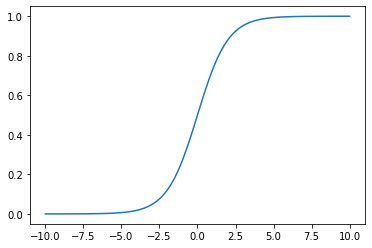

In [5]:
plt.plot(_x, sigmoid(_x));

## Simple three-node network

In [6]:
net1 = NeuralNet(Layer(W=[[0.2, 0.9]], b=[0.5], f=jump))

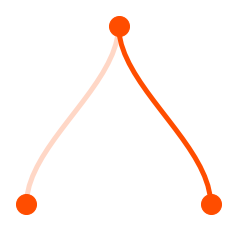

In [7]:
net1.visualize()

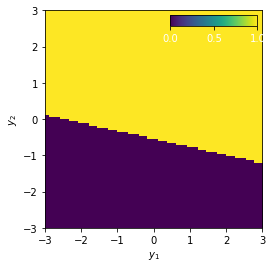

In [8]:
net1.show_output((-3, 3), (-3, 3))

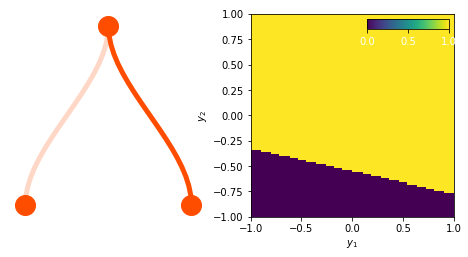

In [9]:
visualize_2to1_network(net1)

In [10]:
def plot_three_node_net(
    w1, w2, b, y0_range=widgets.fixed((-3, 3)), y1_range=widgets.fixed((-3, 3))
):
    NeuralNet(Layer(W=[[w1, w2]], b=b, f=jump)).show_output(
        list(y0_range), list(y1_range), show=False
    )

In [11]:
widgets.interact(
    plot_three_node_net, w1=(-2.0, 2.0), w2=(-2.0, 2.0), b=(-2.0, 2.0), f=jump
)

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

<function __main__.plot_three_node_net(w1, w2, b, y0_range=<ipywidgets.widgets.interaction.fixed object at 0x7faf6ff223d0>, y1_range=<ipywidgets.widgets.interaction.fixed object at 0x7faf6ff22050>)>

## 3-node hidden layer (jump activation function)

In [12]:
net2 = NeuralNet(
    Layer(
        W=[[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3],], b=[0.1, -0.5, -0.5], f=jump,
    ),
    Layer(W=[[-0.3, 0.7, 0.5]], b=[-0.2], f=linear),
)

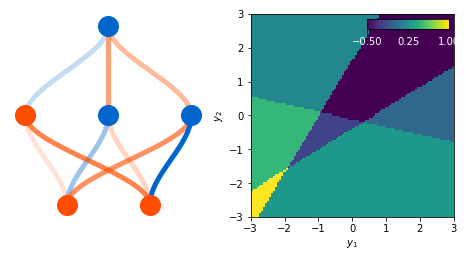

In [13]:
visualize_2to1_network(net2, (-3, 3), (-3, 3))

In [14]:
# the same, but with sigmoid
net3 = NeuralNet(
    Layer(
        W=[[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3],],
        b=[0.1, -0.5, -0.5],
        f=sigmoid,
    ),
    Layer(W=[[-0.3, 0.7, 0.5]], b=[-0.2], f=linear),
)

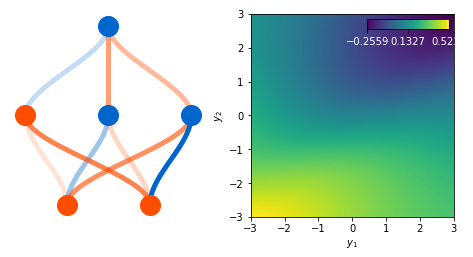

In [15]:
visualize_2to1_network(net3, (-3, 3), (-3, 3))

In [16]:
# sharper sigmoid: scale all weights and biases
factor = 10.0
net4 = NeuralNet(
    Layer(
        W=factor * np.array([[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3]]),
        b=factor * np.array([0.1, -0.5, -0.5]),
        f=sigmoid,
    ),
    Layer(W=factor * np.array([[-0.3, 0.7, 0.5]]), b=-0.2 * factor, f=linear),
)

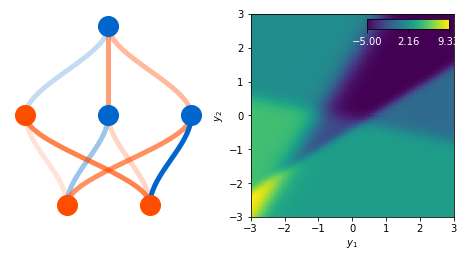

In [17]:
visualize_2to1_network(net4, (-3, 3), (-3, 3))

## Further examples

In [18]:
# now with 5 intermediate neurons, for fun:
net5 =  NeuralNet(
    Layer(
        W=[[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3], [-0.3, -0.9], [-0.8, -1.2]],
        b=[0.1, -0.5, -0.5, 0.3, 0.2],
        f=jump,
    ),
    Layer(W=[[-0.3, 0.7, 0.5, -0.3, 0.4]], b=0.5, f=linear),
)

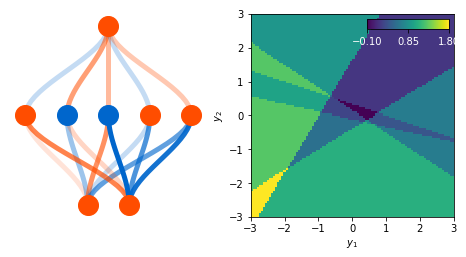

In [19]:
visualize_2to1_network(net5, (-3, 3), (-3, 3))

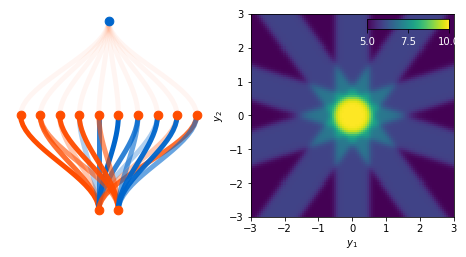

In [20]:
# many superimposed lines
# this can be used to construct arbitrary shapes
# with only a single hidden layer
n_lines = 10
phi = np.linspace(0, 2 * np.pi, n_lines + 1)[:-1]
factor = 20
net6 = NeuralNet(
    Layer(
        W=np.transpose([factor * np.cos(phi), factor * np.sin(phi)]),
        b=np.full(n_lines, factor * 0.5),
        f=sigmoid,
    ),
    Layer(
        W=np.ones(shape=(1, n_lines)),
        b=0.0,
        f=linear
    ),
)
visualize_2to1_network(net6, (-3, 3), (-3, 3), node_size=75)

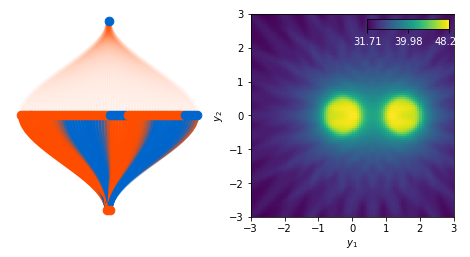

In [21]:
# two blobs, each constructed using many superimposed lines
# this can be used to construct arbitrary shapes
# with only a single hidden layer
n_lines = 30
phi = np.linspace(0, 2 * np.pi, n_lines + 1)[:-1]
factor = 20
shifts = [-0.3, 1.5]
n_blobs = len(shifts)
net7 = NeuralNet(
    Layer(
        W=np.concatenate(
            (np.transpose([factor * np.cos(phi), factor * np.sin(phi)]),)
            * n_blobs
        ),
        b=np.concatenate(
            [
                np.full(n_lines, factor * (+0.5 - s * np.cos(phi)))
                for s in shifts
            ]
        ),
        f=sigmoid,
    ),
    Layer(
        W=np.ones(shape=(1, n_blobs * n_lines)),
        b=0,
        f=linear,
    ),
)
visualize_2to1_network(net7, (-3, 3), (-3, 3), node_size=75)

## Exercise: create a neural network with a square output

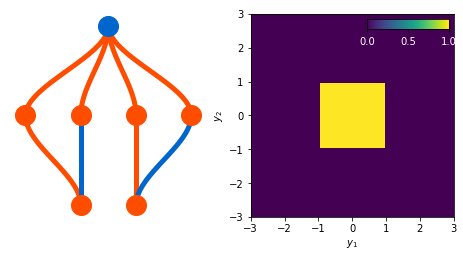

In [22]:
net_square = NeuralNet(
    Layer(W=[[1, 0], [-1, 0], [0, 1], [0, -1],], b=[1, 1, 1, 1], f=jump),
    Layer(W=[[1, 1, 1, 1]], b=-3, f=jump,),
)
visualize_2to1_network(net_square, (-3, 3), (-3, 3))